In [2]:
pip install census

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install us

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [5]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [7]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql2')['host'],
                      user=get_secret('postgresql2')['username'],
                      password = get_secret('postgresql2')['password'],
                      dbname=get_secret('postgresql2')['engine'])

cur = conn.cursor()

In [8]:
from census import Census
from us import states


c = Census(get_secret('census')['api_key'])

In [41]:
conn.rollback()
years = []
growth_rate = []
for i in range(2006, 2020):
    query_t = f"SELECT pop FROM population WHERE year = {i} AND fips = '16'"
    query_t1 = f"SELECT pop FROM population WHERE year = {i - 1} AND fips = '16'"

    years.append(i)
    
    cur.execute(query_t)
    pop_t = cur.fetchone()[0]
    cur.execute(query_t1)
    pop_t1 = cur.fetchone()[0]

    growth_rate.append(((pop_t - pop_t1) / pop_t) * 100)

print("\n\n")
print(years)
print(f'growth rate per year:  {growth_rate}')




[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
growth rate per year:  [4.830050495579505, 2.1966757413955698, 1.6021619408117516, 1.4222399907879475, 1.6321868338159025, 0.853951299223652, 0.6732350375502592, 1.0177801376558802, 1.3660747498874248, 1.236668620425033, 1.676034079161567, 1.9687898782894948, 2.124320491070614, 1.8386012819903024]


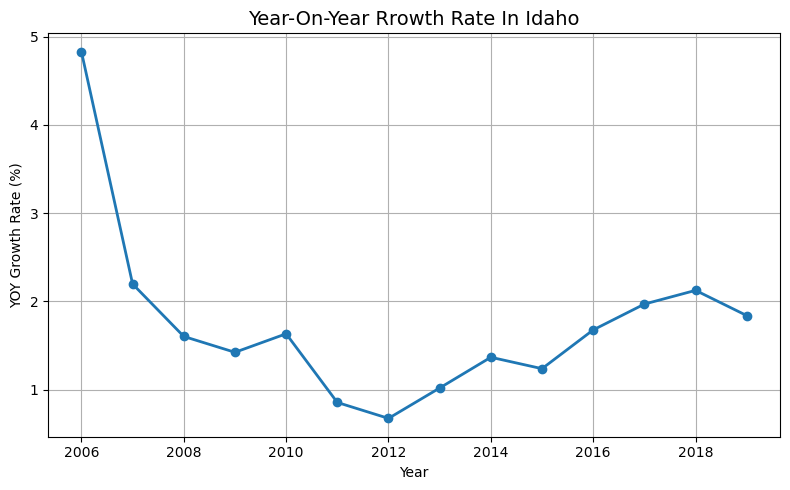

In [44]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8,5))  # optional: sets size
plt.plot(years, growth_rate, marker='o', linestyle='-', linewidth=2)

# Add titles and labels
plt.title("Year-On-Year Rrowth Rate In Idaho", fontsize=14)
plt.xlabel("Year")
plt.ylabel("YOY Growth Rate (%)")

# Optional: make it easier to read
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

This graph shows the year-on-year growth rate in idaho

In [56]:
conn.rollback()
query = "SELECT pop, income.year, income.income FROM income JOIN population ON income.fips = population.fips WHERE income.fips = '16'"
cur.execute(query)
rows = cur.fetchall()
years = []
populations = []
incomes = []
for row in rows:
    population = row[0]
    year = row[1]
    income = row[2]
    incomes.append(income)
    years.append(year)
    populations.append(population)

for e in range(len(years)):
    

print(years)
print("\n\n")
print(incomes)
print("\n\n")
print(populations)
print("\n\n")


[2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2016, 201

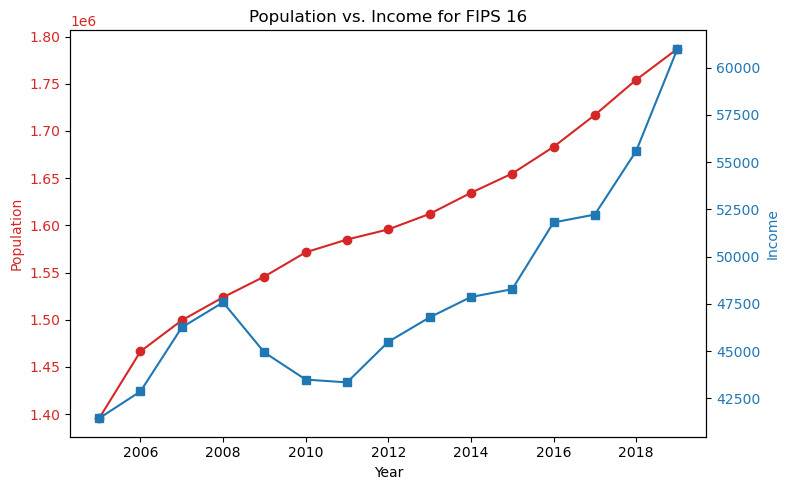

In [59]:
import matplotlib.pyplot as plt

# --- Create Dual-Axis Plot ---
fig, ax1 = plt.subplots(figsize=(8,5))

# Left Y-axis → Population
ax1.plot(years, populations, color='tab:red', marker='o', label='Population')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Right Y-axis → Income
ax2 = ax1.twinx()  # create a twin axis sharing the same x-axis
ax2.plot(years, incomes, color='tab:blue', marker='s', label='Income')
ax2.set_ylabel('Income', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and layout
plt.title('Population and Median Household Income In Idaho')
fig.tight_layout()
plt.grid(True, axis='x')
plt.show()

This graph shows the population vs income for the stae of idaho

In [62]:
# growth_rate
conn.rollback()
nat_growth = []
years = []
for i in range(2006, 2020):   # loop through years
    query_t = f"""
        SELECT SUM(pop) 
        FROM population
        WHERE year = {i}
    """
    query_t1 = f"""
        SELECT SUM(pop)
        FROM population
        WHERE year = {i - 1}
    """

    years.append(i)
    
    cur.execute(query_t)
    pop_t = cur.fetchone()[0]
    cur.execute(query_t1)
    pop_t1 = cur.fetchone()[0]

    nat_growth.append(round(((pop_t - pop_t1) / pop_t) * 100, 2))

print("\n\n")
print(years)
print(f'growth rate per year:  {nat_growth}')




[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
growth rate per year:  [Decimal('3.65'), Decimal('0.73'), Decimal('0.80'), Decimal('0.95'), Decimal('0.67'), Decimal('0.71'), Decimal('0.72'), Decimal('0.68'), Decimal('0.83'), Decimal('0.77'), Decimal('0.50'), Decimal('0.77'), Decimal('0.40'), Decimal('0.32')]


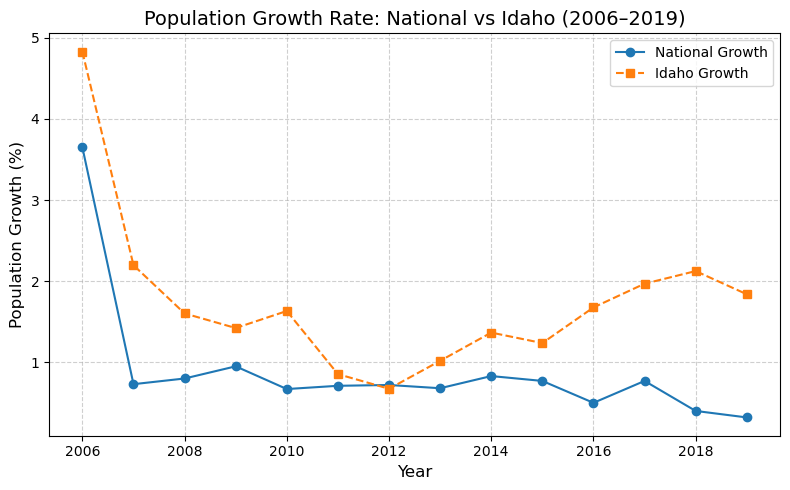

In [63]:
import matplotlib.pyplot as plt

# Assuming you already have:
# years → list of years (e.g., [2006, 2007, ...])
# nat_growth → list of national growth rates (%)
# growth_rate → list of Idaho growth rates (%)

plt.figure(figsize=(8,5))

# Plot national growth
plt.plot(years, nat_growth, marker='o', linestyle='-', color='tab:blue', label='National Growth')

# Plot Idaho growth
plt.plot(years, growth_rate, marker='s', linestyle='--', color='tab:orange', label='Idaho Growth')

# Labels and title
plt.title("Population Growth Rate: National vs Idaho (2006–2019)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population Growth (%)", fontsize=12)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
This graph shows the population growth rate in idaho and nationally between 2006-2019. 